# Why Linear Regression
 
It is one of the simplest yet, very effective algorithm for the following reasons.
- Computationally very cheap. 
- In many of the real life problems, dependent variables seem to hold either linear or quasi-linear relationships with the independent variables. 
- In case the relationship is non-linear, it is also possible to transform the independent variables to mimic the linear relationship.

# Linear Regression through sklearn


Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

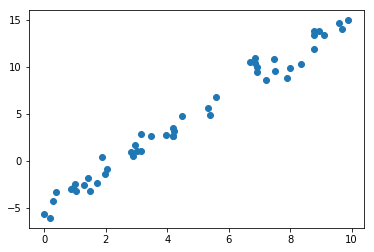

In [4]:
rng = np.random.RandomState(1)
x1 = 10 * rng.rand(50)
y1 = 2 * x1 - 5 + rng.randn(50)
plt.scatter(x1, y1);

We can use Scikit-Learn's ``LinearRegression`` estimator to fit this data and construct the best-fit line:

model coeff: 2.02720881036
model intercept: -4.99857708555


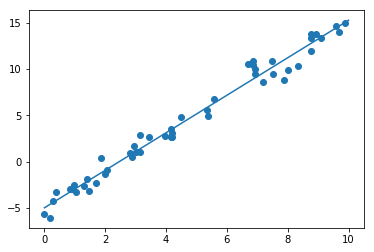

In [6]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression(fit_intercept=True)

model1.fit(x1[:, np.newaxis], y1)

xfit1 = np.linspace(0, 10, 1000)
yfit1 = model1.predict(xfit1[:, np.newaxis])
print "model coeff:", model1.coef_[0]
print "model intercept:", model1.intercept_

plt.scatter(x1, y1)
plt.plot(xfit1, yfit1);

* The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore.
* Here the relevant parameters are ``coef_`` and ``intercept_``:

In [7]:
print("Model slope:    ", model1.coef_[0])
print("Model intercept:", model1.intercept_)

('Model slope:    ', 2.0272088103606953)
('Model intercept:', -4.9985770855532037)


We see that the results are very close to the inputs, as we might hope.

* The ``LinearRegression`` estimator can also handle multidimensional linear models of the form

* Geometrically, it is equivalent to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

# Problems with Linear Regression


## Outliers

Linear regression models are heavily influenced by the outliers in the data.

Consider the earlier discussed data. The coefficient values earlier:

>``model coeff: 2.02720881036``

>``model intercept: -4.99857708555``

Now let's add an outlier. 

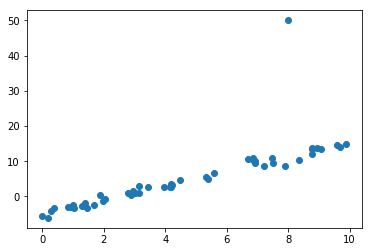

In [17]:
rng = np.random.RandomState(1)
x3 = 10 * rng.rand(50)
y3 = 2 * x3 - 5 + rng.randn(50)
y3[20] = 50
plt.scatter(x3, y3);

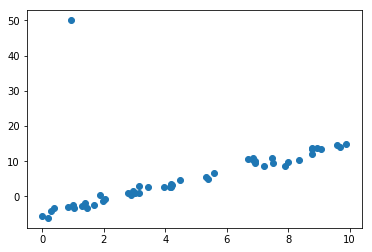

In [18]:
rng = np.random.RandomState(1)
x4 = 10 * rng.rand(50)
y4 = 2 * x4 - 5 + rng.randn(50)
y4[5] = 50
plt.scatter(x4, y4);

In [20]:
model3 = LinearRegression(fit_intercept=True)
model3.fit(x3[:, np.newaxis], y3)

xfit3 = np.linspace(0, 10, 1000)
yfit3 = model3.predict(xfit3[:, np.newaxis])
print "model coeff:", model3.coef_[0]
print "model intercept:", model3.intercept_

model coeff: 2.31463440241
model intercept: -5.53823193102


In [19]:
model4 = LinearRegression(fit_intercept=True)
model4.fit(x4[:, np.newaxis], y4)

xfit4 = np.linspace(0, 10, 1000)
yfit4 = model4.predict(xfit4[:, np.newaxis])
print "model coeff:", model4.coef_[0]
print "model intercept:", model4.intercept_

model coeff: 1.60175074269
model intercept: -1.95341547471


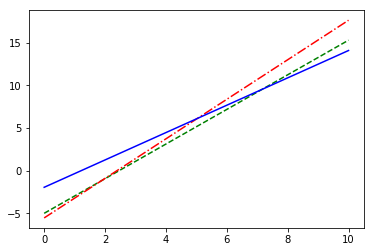

In [25]:
# plt.scatter(x3, y3)
# plt.scatter(x1, y1)
# plt.scatter(x4, y4)

plt.plot(xfit1, yfit1, "g--");
plt.plot(xfit3, yfit3, "r-.");
plt.plot(xfit4, yfit4, "b-");

* **A single outlier can significantly change the model parameters.**

## Linear separability

Consider follwing data.

* Here, data is generated by adding noise to a `sin` function.
* It is evident that a linear model will not be able to fit the datapoints properly.

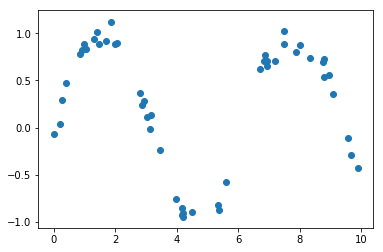

In [13]:
rng = np.random.RandomState(1)
x2 = 10 * rng.rand(50)
y2 = np.sin(x2) + 0.1 * rng.randn(50)

plt.scatter(x2, y2);

# Handling Outliers

# Handling Non-linear Data (Polynomial Features)

Consider following non-linear data again.

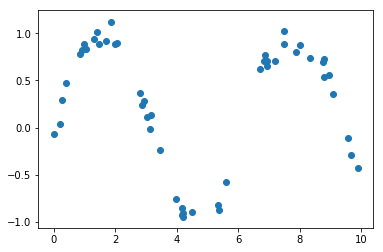

In [54]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

plt.scatter(x, y);

* Variables which are non-linearly related to the dependent variables need to be transformed.
* Transformation can be carried out according to **basis functions**.

* Take the multidimensional linear model:

$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$

and build the $x_1, x_2, x_3,$ and etc, from the single-dimensional input $x$ so that the model becomes a polynomial regression:

$$
y = a_0 + a_1 x_1 + a_2 x_1^2 + a_3 x_2^2 + \cdots
$$

* This is still *a linear model* as the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other.
* One-dimensional $x$ values projected into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

## Ploynomial Bases Function with sklearn

Polynomial projection is built into Scikit-Learn, using the ``PolynomialFeatures`` transformer:

In [7]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.]])

Let's make a 7th-degree polynomial model for the non-linear data we saw earlier

In [13]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

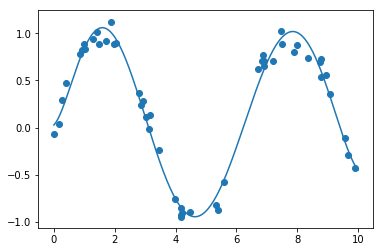

In [24]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

7th-order polynomial basis function can provide an excellent fit to this non-linear data

## Gaussian Bases Function:

* Rather than polynomial bases, a model can be fit on a sum of Gaussian bases as well
* Gaussian basis functions are not built into Scikit-Learn
* Example code below to create custom Gaussian bases transformer 

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    

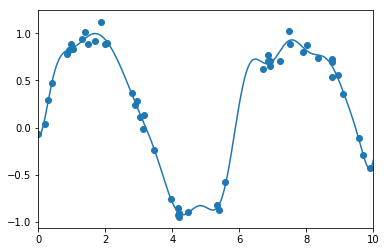

In [16]:
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

# Regularization

**Resources**

1.  [Why?](http://stats.stackexchange.com/questions/4272/when-to-use-regularization-methods-for-regression?noredirect=1&lq=1)
* [L1](http://stats.stackexchange.com/questions/200416/is-regression-with-l1-regularization-the-same-as-lasso-and-with-l2-regularizati) + intuition about its effect
* [L2](http://statweb.stanford.edu/~tibs/sta305files/Rudyregularization.pdf) + intuition about its effect
* [L1 vs L2](???)
* [L1 + L2](http://stats.stackexchange.com/questions/184029/what-is-elastic-net-regularization-and-how-does-it-solve-the-drawbacks-of-ridge?rq=1) (short mention)
* [A worked-out example](https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/)


* Although, the basis functions makes the model much more flexible, they leads to over-fitting.
* For example, if we choose too many Gaussian basis functions, we end up with results that don't look so good:

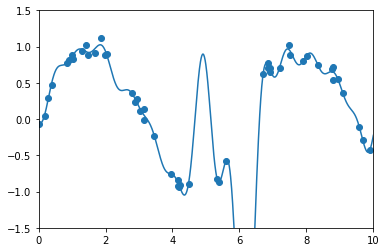

In [17]:
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

* With the data projected to the 30-dimensional basis, the model significantly ovefits.
* We can see the reason for this if we plot the coefficients of the Gaussian bases with respect to their locations:

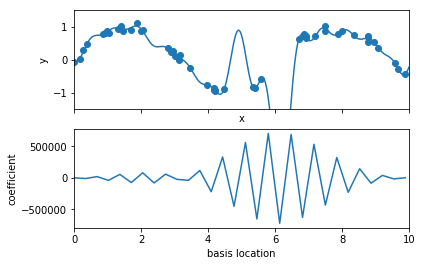

In [18]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

* This is typical over-fitting behavior when basis functions overlap: 
* The coefficients of adjacent basis functions blow up and cancel each other out.


* We need to limit limit such spikes expliticly in the model by penalizing large values of the model parameters.
* Such a penalty is known as **regularization**.

**Two most used types of regularization**

1. Ridge Regularization
2. Lasso Regularization

## Lasso regression ($L_1$ regularization)

* Involves penalizing the sum of absolute values (1-norms) of regression coefficients:
$$
P = \alpha\sum_{n=1}^N |\theta_n|
$$
* Though this is conceptually very similar to ridge regression, the results can differ surprisingly
* For example, due to geometric reasons lasso regression tends to favor **sparse models** 
* That is, it preferentially sets model coefficients to exactly zero
* This results in feature selection

* E.g. Suppose the model have 100 coefficients but only 10 of them have non-zero coefficients, this is effectively saying that “the other 90 predictors are useless in predicting the target values”.

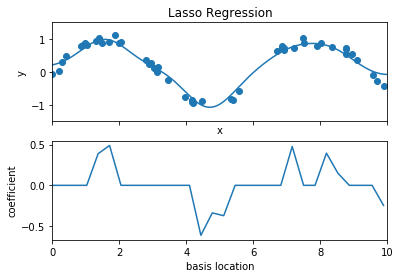

In [20]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.01))
basis_plot(model, title='Lasso Regression')

* With the lasso regression penalty, the majority of the coefficients are exactly zero
* The functional behavior is modeled by a small subset of the available basis functions.
* The $\alpha$ parameter tunes the strength of the penalty, and should be determined via cross-validation.

## Ridge regression ($L_2$ Regularization)

* Also called *Tikhonov regularization*.
* This proceeds by penalizing the sum of squares (2-norms) of the model coefficients
* In this case, the penalty on the model fit would be 
$$
P = \alpha\sum_{n=1}^N \theta_n^2
$$
where $\alpha$ is a free parameter that controls the strength of the penalty.

* This type of penalized model is built into Scikit-Learn with the ``Ridge`` estimator:

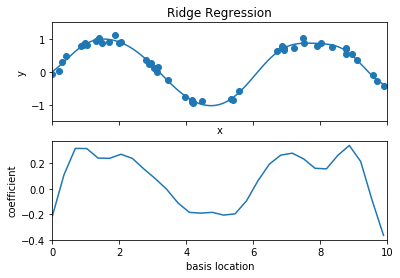

In [23]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

* The $\alpha$ parameter controls complexity of the resulting model.
* In the limit $\alpha \to 0$, we recover the standard linear regression result.
* In the limit $\alpha \to \infty$, all model responses will be suppressed.
* Ridge regression can be computed very efficiently—at hardly more computational cost than the original linear regression model.

## L1 vs L2

**Built-in feature selection** 
* A useful property of the L1-norm, which the L2-norm does not. 
* A result of the L1-norm, which tends to produces sparse coefficients.
* L2-norm produces non-sparse coefficients, so does not have this property.

**Sparsity** 
* Refers to that only very few entries in a matrix (or vector) is non-zero. 
* L1-norm has the property of producing many coefficients with zero values or very small values with few large coefficients.

**Computational efficiency**
* L1-norm does not have an analytical solution, but L2-norm does. 
* This allows the L2-norm solutions to be calculated computationally efficiently. 
* However, L1-norm solutions does have the sparsity properties which allows it to be used along with sparse algorithms, which makes the calculation more computationally efficient.

**Summary:**

![](http://www.chioka.in/wp-content/uploads/2013/12/L1-vs-L2-properties-regularization.png)

[source](http://www.chioka.in/wp-content/uploads/2013/12/L1-vs-L2-properties-regularization.png)


![](http://www.chioka.in/wp-content/uploads/2013/12/L1-norm-and-L2-norm-distance.png)

[source](http://www.chioka.in/wp-content/uploads/2013/12/L1-norm-and-L2-norm-distance.png)

* The green line (L2-norm) is the unique shortest path, while the red, blue, yellow (L1-norm) are all same length (=12) for the same route. 
* This is why L2-norm has unique solutions while L1-norm does not.

## L1 + L2: The Elastic Net

* Elastic Net regularization is the combination of both L1 and L2 regularization. 

$$
P = \alpha\sum_{n=1}^N |\theta_n| + \alpha\sum_{n=1}^N \theta_n^2
$$

* Elastic net generally seems to perform better than the individual L1 and L2 regularizations.
* However, it is computationally more expensive.

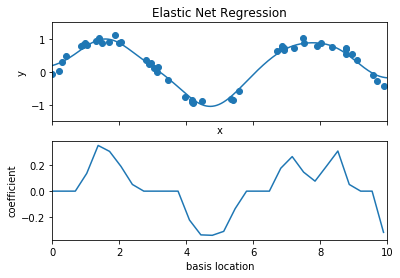

In [61]:
from sklearn.linear_model import ElasticNet
model = make_pipeline(GaussianFeatures(30), ElasticNet(alpha=0.01))
basis_plot(model, title='Elastic Net Regression')

# Bias-Variance trade-off (revisit for every model)

# Logistic Regression

* Logistic Regression is a classification algorithm. 
* Classification equivalent of Linear Regression.
* Used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables. 
* It predicts the probability of occurrence of an event by fitting data to a logit function.

## Why Logistic Regression?

A *Generalised Linear Model* (GML) can be given by

$$
g(E(y)) = \theta_0 + \theta_1 x_1 + \theta_2 x_2
$$

* In case of Linear Regression Model, the function $g()$ is an identity function.
* We cannot conrtol the upper and lower limit of the target variable in case of Linear Regression
* However, if the target variable is let's say probability p, then the target variable must be between 0 and 1.
* We can achieve this by:

$$
g(x) = log (\frac{x}{1-x})
$$

Hence, the GML transforms to

$$
log (\frac{E(y)}{1-E(y)}) = \theta_0 + \theta_1 x_1 + \theta_2 x_2
$$

or 

$$
log (\frac{p}{1-p}) = \theta_0 + \theta_1 x_1 + \theta_2 x_2
$$

* This is the equation used in Logistic Regression. 
* Here (p/1-p) is the odd ratio. 
* Whenever the log of odd ratio is found to be positive, the probability of success is always more than 50%

[ 7.14248671  1.12930053]


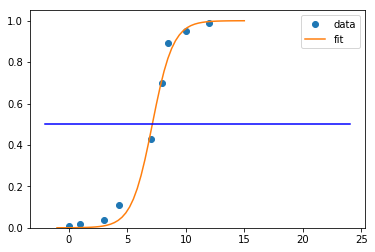

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def sigmoid(x, x0, k):
     y = 1 / (1 + np.exp(-k*(x-x0)))
     return y

xdata = np.array([0.0,   1.0,  3.0, 4.3, 7.0,   8.0,   8.5, 10.0, 12.0])
ydata = np.array([0.01, 0.02, 0.04, 0.11, 0.43,  0.7, 0.89, 0.95, 0.99])

popt, pcov = curve_fit(sigmoid, xdata, ydata)
print popt

x = np.linspace(-1, 15, 50)
y = sigmoid(x, *popt)

plt.plot(xdata, ydata, 'o', label='data')
plt.plot(x,y, label='fit')
plt.plot(range(-2, 25), [0.5]*27, "b-")
plt.ylim(0, 1.05)
plt.legend(loc='best')
plt.show()

## Assessing model quality

Various classification metrics can be used to evaluate the model quality. 

* Accuracy
* Precision
* Recall
* f1
* AUC

All of the above can be obtained through a confusion matrix.

![](https://www.analyticsvidhya.com/wp-content/uploads/2015/11/1111.png)
[source](https://www.analyticsvidhya.com/wp-content/uploads/2015/11/1111.png)

## Logistic Regression with sklearn

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
iris_X = iris.data
iris_y = iris.target

iris_X_train, iris_X_test, iris_y_train, iris_y_test = \
                            train_test_split(iris_X, iris_y, train_size=0.8, random_state=7)

In [91]:
logistic = LogisticRegression(random_state=7)
logistic.fit(iris_X_train, iris_y_train)
iris_y_predict = logistic.predict(iris_X_test)

In [92]:
accuracy_score(iris_y_test, iris_y_predict)

0.80000000000000004

# GD for Logistic Regression

* 
* 
* 

# [Hands-on]

## On industry dataset, build models using
- Linear Regression
- Logistic Regression
- L1 regularization
- L2 regularization

## Discuss how the different models handled the various properties of the dataset